## Bank Note Authentication UCI data


### About Data:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


###### Link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

In [62]:
#import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
#import data
df =pd.read_csv('BankNote_Authentication.csv')

In [7]:
df.head(3)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [8]:
df.shape

(1372, 5)

In [31]:
#check for null values
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [13]:
#define independant and dependent variable
X =df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
X.head(3)

,variance,skewness,curtosis,entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

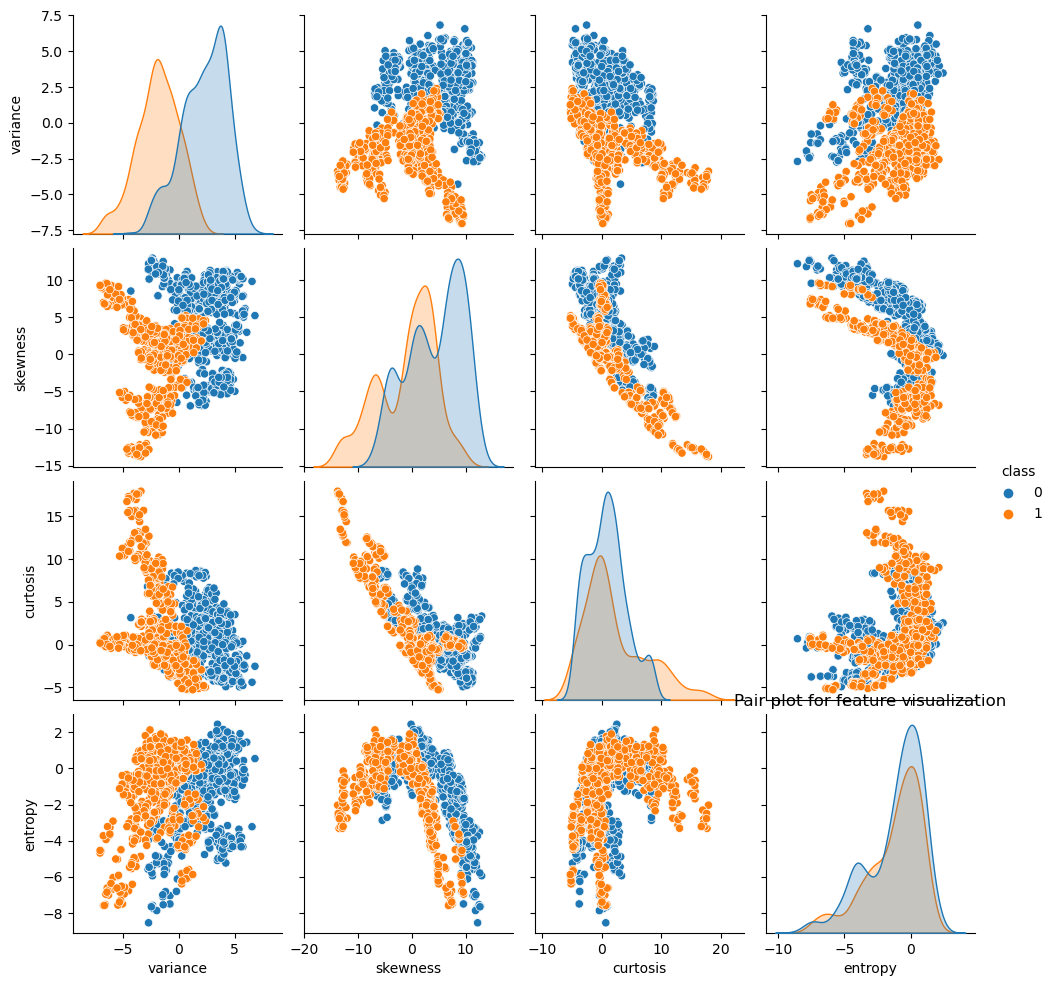

In [29]:
#pair plot for feature visualization

sns.pairplot(data=df,hue='class')
plt.title('Pair plot for feature visualization')
plt.show()

In [49]:
#split data into training and test

X_train,X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=0)

In [53]:
#implement randomforest classifier
classifier =RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
#prediction

y_pred =classifier.predict(X_test)

In [55]:
#check accuracy 
score =accuracy_score(y_test, y_pred)
score

0.9902912621359223

In [79]:
### Create a Pickle file using serialization 
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [80]:
X.columns

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

In [81]:
new_data =pd.DataFrame([[-2,-3,-4,1]],columns=['variance', 'skewness', 'curtosis', 'entropy'])
classifier.predict(new_data)

array([1], dtype=int64)